
# ***Team Targaryns***

#### Mounting the GDrive for Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#### Reading the Dataset

In [ ]:
import pandas as pd
raw_dataset = pd.read_csv("/content/drive/My Drive/Genpact AI Hackathon/Datasets/IMDB Dataset.csv")

In [ ]:
raw_dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### Removing HTML Tags

In [ ]:
import re

def remove_html_tags(text):
  return re.sub(r"<.*?>", "", text)

raw_dataset["cleared_review"] = raw_dataset["review"].apply(remove_html_tags)

In [ ]:
raw_dataset

,review,sentiment,cleared_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I'm going to have to disagree with the previou...


#### Handling Missing Summary


In [ ]:
missing_values = raw_dataset.isnull().sum()

print("Missing Values Summary:")
print("-" * 40)
print(f"{'Column':<15}{'Missing Values':<15}{'Total Rows':<10}")
print("-" * 40)
for column in raw_dataset.columns:
    print(f"{column:<15}{missing_values[column]:<15}{len(raw_dataset):<10}")

Missing Values Summary:
----------------------------------------
Column         Missing Values Total Rows
----------------------------------------
review         0              50000     
sentiment      0              50000     
cleared_review 0              50000     


#### Dropping the null reviews rows

In [ ]:
# use only when there are empty rows in the dataset
raw_dataset = raw_dataset.dropna(subset=["review"])
# if null value uses a placeholder
# raw_dataset["review"].fillna("No text available", inplace=True)


In [ ]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


raw_dataset['label_encoded'] = encoder.fit_transform(raw_dataset['sentiment'])

raw_dataset

,review,sentiment,cleared_review,label_encoded
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,negative,I'm going to have to disagree with the previou...,0


#### Handling Missing Labels

In [ ]:
import pandas as pd
from IPython.display import clear_output

# Example dataset with missing labels (replace this with your dataset)
data = {
    "ID": [1, 2, 3, 4, 5],
    "Text": ["I love this product!", "Not what I expected", "The service was average.", "Great experience!", "Worst purchase ever!"],
    "Label": ["Positive", None, "Neutral", None, "Negative"]
}


df = pd.DataFrame(data)

def fill_missing_labels(df):
    while df['Label'].isnull().any():
        for idx, row in df[df['Label'].isnull()].iterrows():
            clear_output(wait=True)


            print(f"Row ID: {row['ID']}")
            print(f"Text: {row['Text']}")
            print("Available options: Positive, Negative, Neutral")


            user_input = None
            while user_input not in ["Positive", "Negative", "Neutral"]:
                user_input = input(f"Enter label for Row ID {row['ID']}: ")
                if user_input not in ["Positive", "Negative", "Neutral"]:
                    print("Invalid input. Please enter 'Positive', 'Negative', or 'Neutral'.")


            df.at[idx, 'Label'] = user_input
            print(f"Label for Row ID {row['ID']} has been updated to: {user_input}")
            break

    return df


print("Data before filling missing labels:")
display(df)

df = fill_missing_labels(df)

clear_output(wait=True)
print("\nData after filling missing labels:")
display(df)


Row ID: 2
Text: Not what I expected
Available options: Positive, Negative, Neutral


KeyboardInterrupt: Interrupted by user

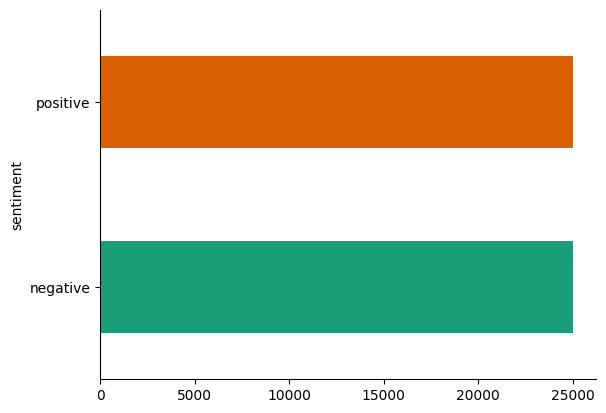

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
raw_dataset.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Splitting into Train, Val, Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.7
val_size = 0.15
test_size = 0.15

train_df, temp_df = train_test_split(raw_dataset, test_size=(1- train_size), random_state =42, shuffle=True)

val_df, test_df = train_test_split(temp_df, test_size=(test_size / (test_size + val_size)), random_state=42, shuffle=True)

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 34999
Validation size: 7500
Test size: 7501


In [ ]:
# @title Importing important libaries

!pip install datasets
!pip install evaluate
!pip install transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler, AdamW, DataCollatorWithPadding
from datasets import load_dataset, Dataset, DatasetDict
from torch.utils.data import DataLoader
import torch
from tqdm.auto import tqdm



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.0 MB/s eta 0:00:00


In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'cleared_review', 'label_encoded', '__index_level_0__'],
        num_rows: 34999
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'cleared_review', 'label_encoded', '__index_level_0__'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['review', 'sentiment', 'cleared_review', 'label_encoded', '__index_level_0__'],
        num_rows: 7501
    })
})


In [ ]:
dataset = dataset.remove_columns(['review'])
dataset = dataset.remove_columns(['sentiment'])

In [ ]:
dataset = dataset.remove_columns(['__index_level_0__'])

In [ ]:
dataset  = dataset.rename_column('label_encoded', 'labels')
dataset = dataset.rename_column('cleared_review', 'text')


In [ ]:
checkpoint1 = "roberta-base"

tokenizer1 = AutoTokenizer.from_pretrained(checkpoint1)
def tokenize_function1(examples):
    return tokenizer1(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors=None  # This ensures we get a dictionary of lists
    )

tokenized_dataset1 = dataset.map(tokenize_function1, batched=True)



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/34999 [00:00<?, ? examples/s]

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/7501 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset1 =tokenized_dataset1.remove_columns(["text"])
tokenized_dataset1.set_format("torch")
tokenized_dataset1["train"].column_names


['labels', 'input_ids', 'attention_mask']

In [ ]:
data_collator1 = DataCollatorWithPadding(tokenizer=tokenizer1)

train_dataloader1 = DataLoader(
    tokenized_dataset1["train"], shuffle=True, batch_size=8, collate_fn=data_collator1
)
eval_dataloader1 = DataLoader(
    tokenized_dataset1["validation"], batch_size=8, collate_fn=data_collator1
)
test_dataloader1 = DataLoader(
    tokenized_dataset1["test"], batch_size =8, collate_fn=data_collator1
)

In [ ]:
for batch in train_dataloader1:
  break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 512]),
 'attention_mask': torch.Size([8, 512])}

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained(checkpoint1)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = AdamW(model1.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader1)
lr_scheduler = get_scheduler(
    "linear",
    optimizer = optimizer,
    num_warmup_steps=0,
    num_training_steps = num_training_steps,

)
print(num_training_steps)

13125


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model1.to(device)
device


device(type='cuda')

In [ ]:
progress_bar = tqdm(range(num_training_steps))

model1.train()
for epoch in range(num_epochs):
  for batch in train_dataloader1:
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model1(**batch)
    loss = outputs.loss
    loss.backward()

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar.update(1)

  0%|          | 0/13125 [00:00<?, ?it/s]

In [78]:
model1.save_pretrained("./saved_model1")

In [80]:
!pip install evaluate
import evaluate
metric = evaluate.load("accuracy")
model1.eval()
for batch in eval_dataloader1:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model1(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()



{'accuracy': 0.9481333333333334}

In [81]:
metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
model1.eval()
for batch in test_dataloader1:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model1(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])
    f1_metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()
f1_metric.compute()


{'f1': 0.9499003322259136}

In [82]:
checkpoint2 = "distilbert/distilbert-base-uncased"


In [83]:
tokenizer2 = AutoTokenizer.from_pretrained(checkpoint2)
def tokenize_function2(examples):
    return tokenizer1(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors=None  # This ensures we get a dictionary of lists
    )

tokenized_dataset2 = dataset.map(tokenize_function2, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/34999 [00:00<?, ? examples/s]

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/7501 [00:00<?, ? examples/s]

In [84]:
tokenized_dataset2

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 34999
    })
    validation: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 7500
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 7501
    })
})

In [86]:
tokenized_dataset2 =tokenized_dataset2.remove_columns(["text"])
tokenized_dataset2.set_format("torch")
tokenized_dataset2["train"].column_names


['labels', 'input_ids', 'attention_mask']

In [87]:
data_collator2 = DataCollatorWithPadding(tokenizer=tokenizer2)

train_dataloader2 = DataLoader(
    tokenized_dataset2["train"], shuffle=True, batch_size=8, collate_fn=data_collator1
)
eval_dataloader2 = DataLoader(
    tokenized_dataset2["validation"], batch_size=8, collate_fn=data_collator1
)
test_dataloader2 = DataLoader(
    tokenized_dataset2["test"], batch_size =8, collate_fn=data_collator1
)

In [88]:
for batch in train_dataloader1:
  break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 512]),
 'attention_mask': torch.Size([8, 512])}

In [89]:
model2 = AutoModelForSequenceClassification.from_pretrained(checkpoint2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [90]:
optimizer = AdamW(model1.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader1)
lr_scheduler = get_scheduler(
    "linear",
    optimizer = optimizer,
    num_warmup_steps=0,
    num_training_steps = num_training_steps,

)
print(num_training_steps)

13125


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [91]:
progress_bar = tqdm(range(num_training_steps))

model2.train()
for epoch in range(num_epochs):
  for batch in train_dataloader2:
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model1(**batch)
    loss = outputs.loss
    loss.backward()

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar.update(1)

  0%|          | 0/13125 [00:00<?, ?it/s]

KeyboardInterrupt: 